Basic questions to answer first:

1. Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2. What deck were the passengers on and how does that relate to their class?
3. Where did the passengers come from?
4. Who was alone and who was with family?

Further questions

5. What factors helped someone survive the sinking?

In [52]:
import pandas as pd
from pandas import Series, DataFrame

In [53]:
titanic_df = pd.read_csv('train.csv')

In [54]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

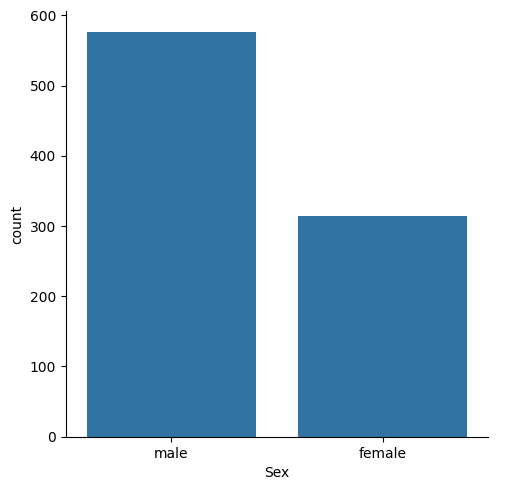

In [57]:
sns.catplot(x='Sex' , data=titanic_df, kind='count')
# Count of males and females

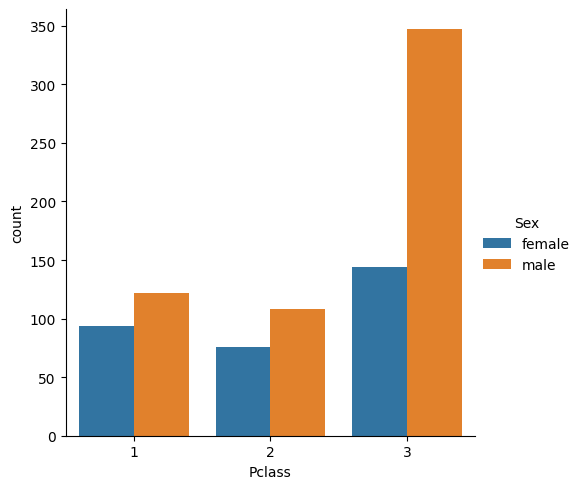

In [58]:
sns.catplot(x='Pclass', hue='Sex', data=titanic_df, kind='count')
# Count of female and males in relation to their class

In [59]:
def male_female_child(passenger):
    age, sex = passenger

    # If age is less than 16 then return child otherwise return the sex.
    if age < 16:
        return 'child'

    else:
        return sex

In [60]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child,axis=1)
# creates new column called person and applies the function row by row with axis=1

In [61]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


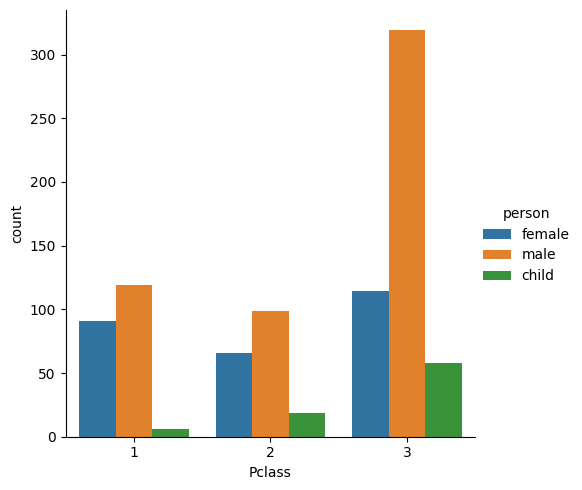

In [62]:
sns.catplot(x='Pclass', hue='person', data=titanic_df, kind='count')
# Count of female, male and child in relationship to their Pclass

<Axes: >

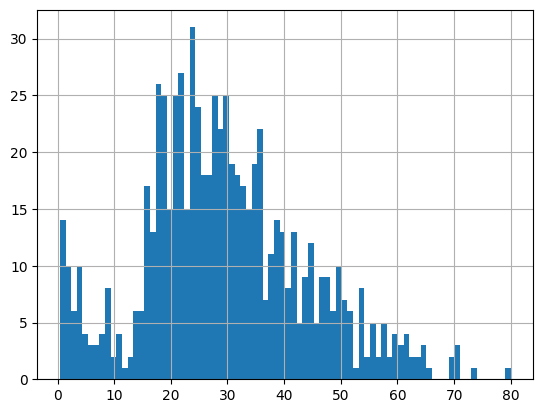

In [63]:
titanic_df['Age'].hist(bins=80)
# Distribution of age

In [64]:
titanic_df['Age'].mean()
# mean age of the passengers

np.float64(29.69911764705882)

In [65]:
titanic_df['person'].value_counts()

person
male      537
female    271
child      83
Name: count, dtype: int64

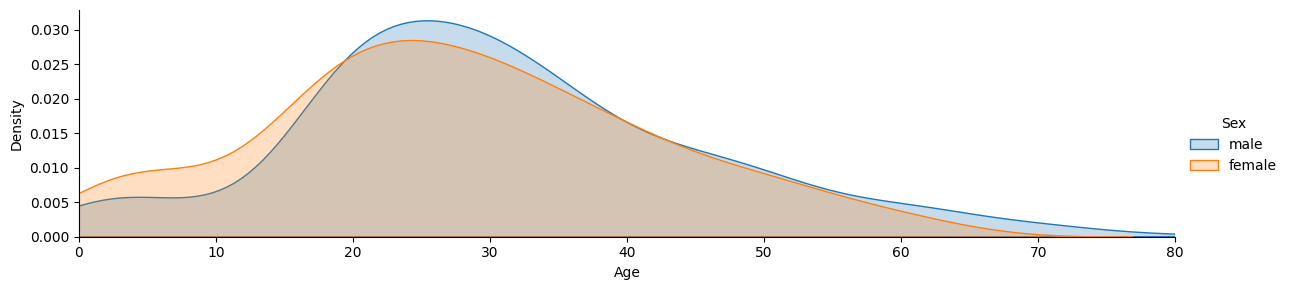

In [66]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)

oldest=titanic_df['Age'].max()
fig.set(xlim=(0, oldest)) # Sets the x-axis limit
fig.add_legend() # Adds a legend to the plot

# Kernel density estimate plot for age based on the age of the passengers.

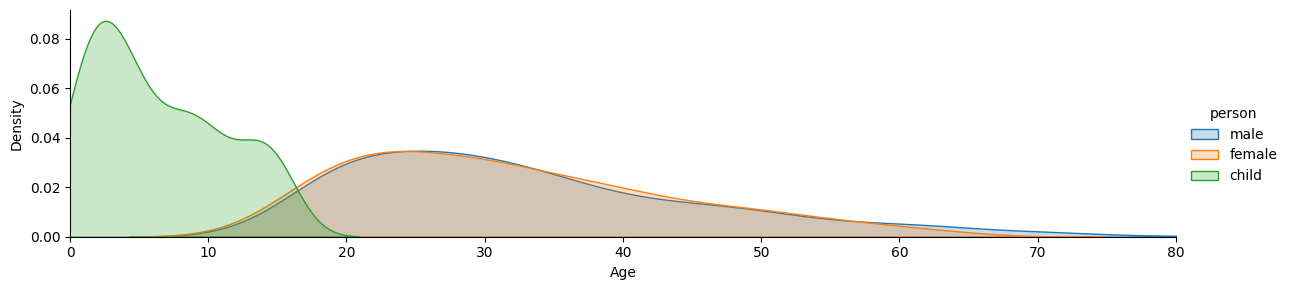

In [67]:
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)

oldest=titanic_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
# Kernel density estimate plot for age based on male, female and child.

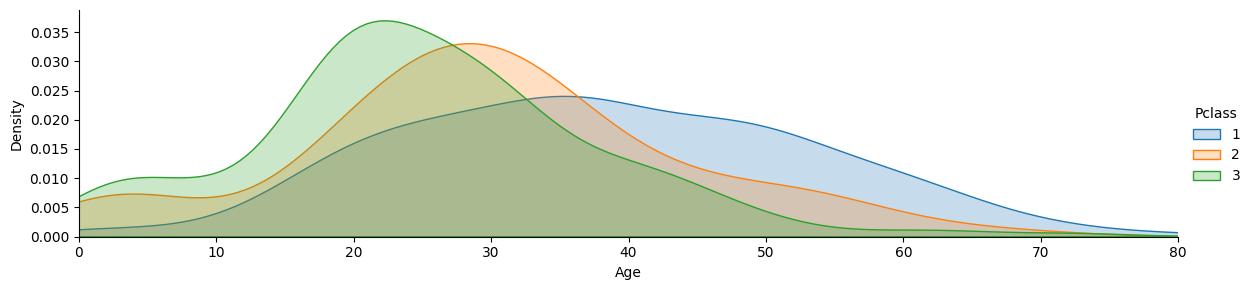

In [68]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)

oldest=titanic_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
# Kernel density estimate plot for age based on their class.

In [69]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [70]:
deck = titanic_df['Cabin'].dropna()

In [71]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

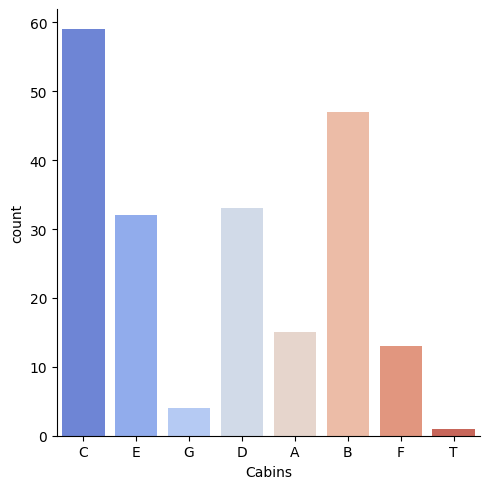

In [72]:
levels = []
# Appends the first letter of the cabins to understand what deck the passenger was on.
for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels) # Creates the dataframe
cabin_df.columns=['Cabins'] # Renames the column
sns.catplot(x='Cabins', hue='Cabins', data=cabin_df, kind='count', palette='coolwarm')
# Number of people in each level of the cabins.

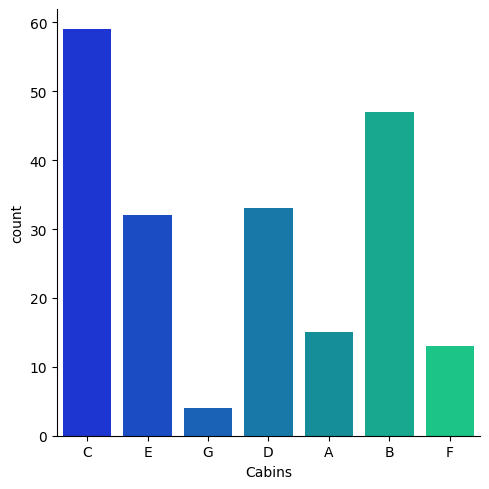

In [73]:
cabin_df = cabin_df[cabin_df.Cabins !='T']
sns.catplot(x='Cabins', hue='Cabins', data=cabin_df, kind='count', palette='winter')
# Exclusion of T from the cabins column.

In [74]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


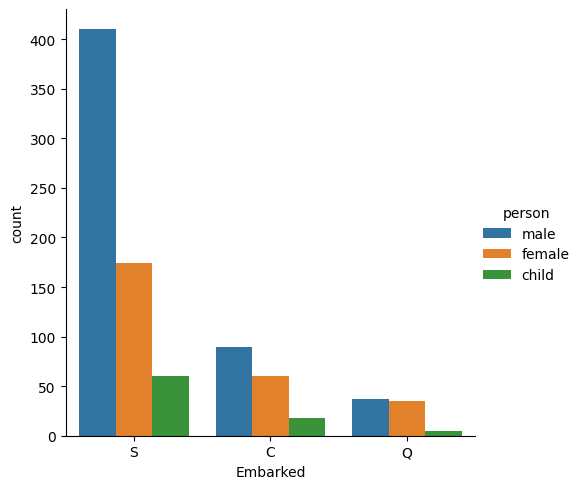

In [75]:
sns.catplot(x='Embarked', hue='person', data=titanic_df, kind='count')
# Where the passengers embarked from based on male, female and child.

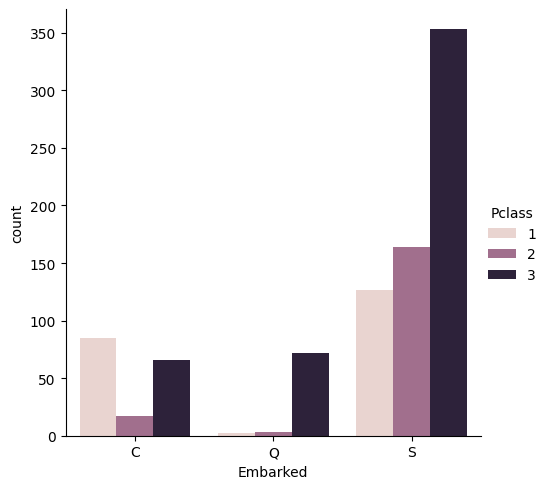

In [76]:
sns.catplot(x='Embarked', hue='Pclass', data=titanic_df, kind='count', order=['C','Q','S'])
# Where the passengers embarked from based on class.

In [77]:
# Who was alone and who was with family?
# SibSp - Number of Siblings/Spouses Aboard
# Parch - Number of Parents/Children Aboard
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [78]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [79]:
titanic_df['Alone']
# If the value is 0 that means they were alone.

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [80]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'
# .loc means find specific rows based on a condition.

C:\Users\hlc65\AppData\Local\Temp\ipykernel_3884\1471143573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
C:\Users\hlc65\AppData\Local\Temp\ipykernel_3884\1471143573.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'With Family' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'


In [81]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


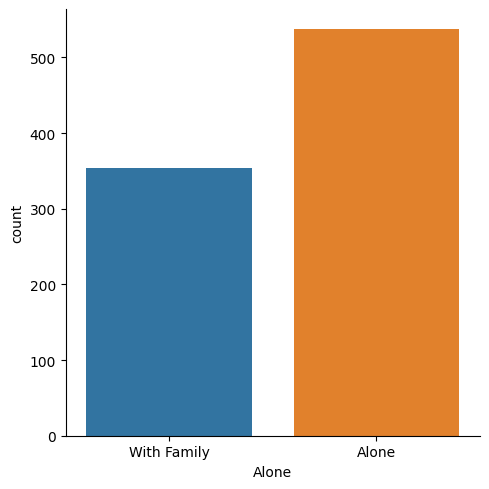

In [82]:
sns.catplot(x='Alone', hue='Alone', data=titanic_df, kind='count')
# Number of people that were with family or alone on the titanic.

In [83]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

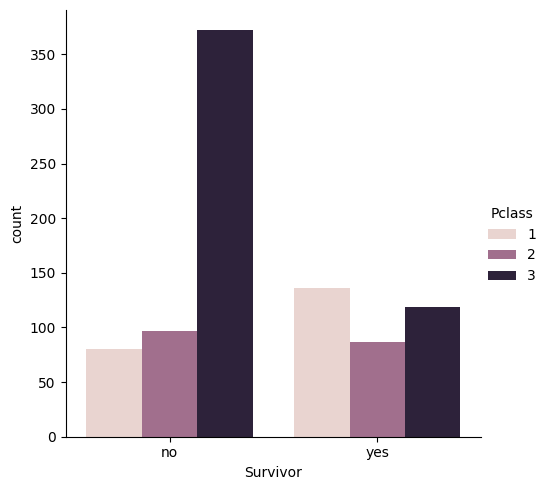

In [84]:
sns.catplot(x='Survivor', hue='Pclass', data=titanic_df, kind='count')
# Number of people that survived or did not survive on the titanic based on class.

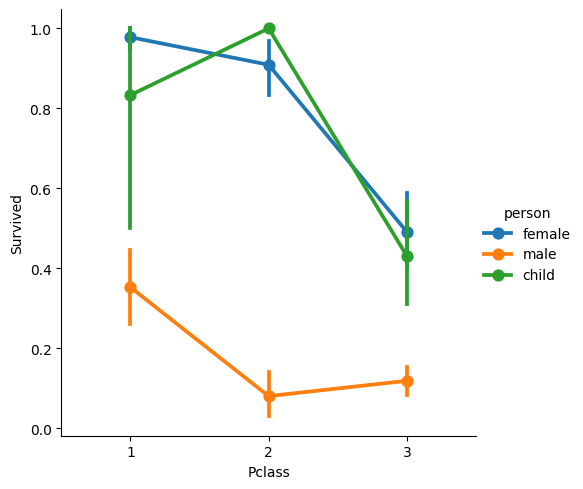

In [85]:
sns.catplot(x='Pclass', y='Survived', hue='person', data=titanic_df, kind='point')
# Number of people that survived or did not survive on the titanic based on class.


<Axes: xlabel='Age', ylabel='Survived'>

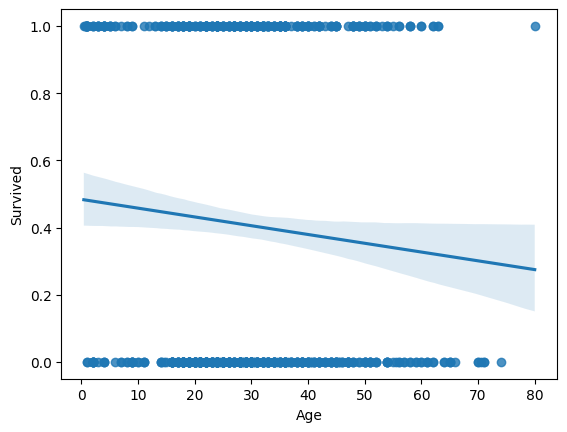

In [86]:
sns.regplot(x='Age', y='Survived', data=titanic_df)

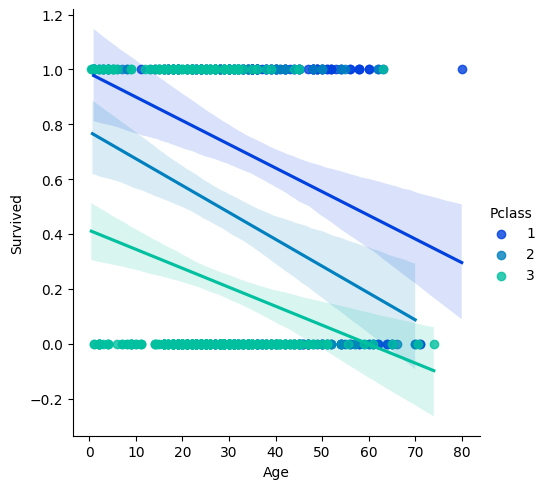

In [87]:
sns.lmplot(x='Age', y='Survived',hue='Pclass', data=titanic_df, palette='winter')

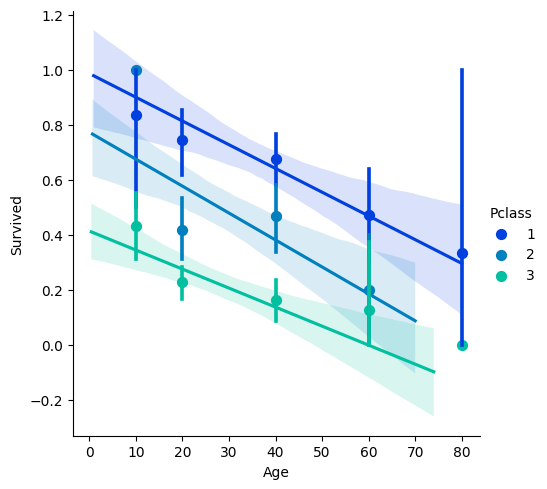

In [88]:
generations = [10,20,40,60,80]
sns.lmplot(x='Age', y='Survived',hue='Pclass', data=titanic_df, palette='winter', x_bins=generations)

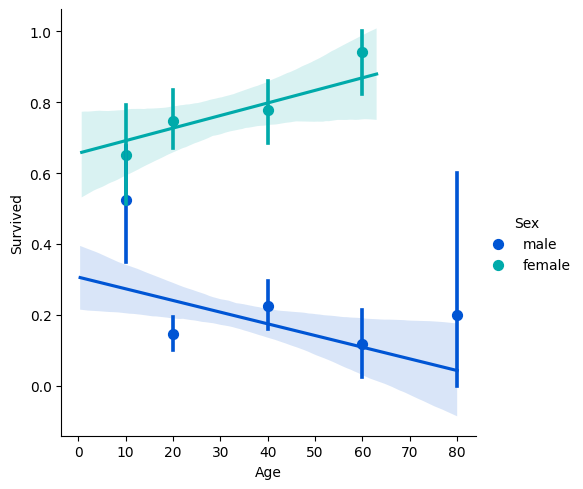

In [89]:
sns.lmplot(x='Age', y='Survived',hue='Sex', data=titanic_df, palette='winter', x_bins=generations)

Further questions:
1) Did the deck have an effect on the passengers survival rate? 
2) Did having a family member increase the odds of surviving the crash?

In [90]:
common_indices = deck.index.intersection(cabin_df.index)
titanic_df.loc[common_indices, 'Deck'] = cabin_df.loc[common_indices, 'Cabins'].values

In [91]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,NaN


C:\Users\hlc65\AppData\Local\Temp\ipykernel_3884\2591136813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deck', y='Survived', data=filtered_df, palette='winter')


<Axes: xlabel='Deck', ylabel='Survived'>

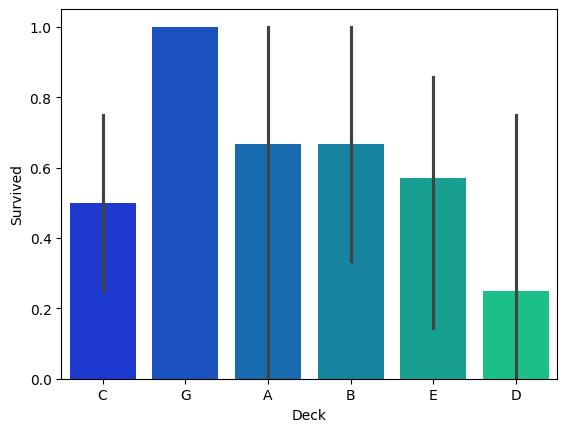

In [92]:
filtered_df = titanic_df[titanic_df['Deck'] != 'T']
sns.barplot(x='Deck', y='Survived', data=filtered_df, palette='winter')
# Survival based on the different decks

<Axes: xlabel='Alone', ylabel='Survived'>

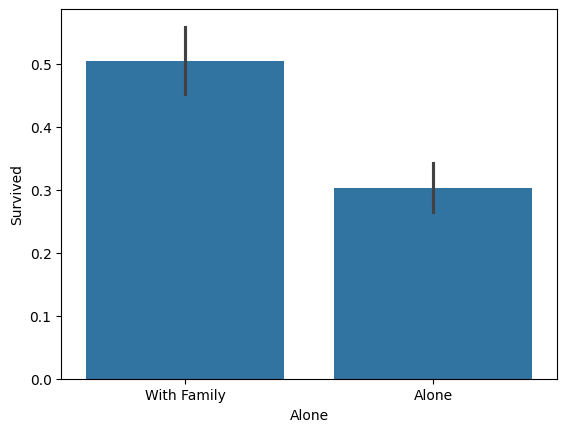

In [93]:
sns.barplot(x='Alone', y='Survived', data=titanic_df)
# Survival chance based on if the passenger was with family or alone.